In [1]:
import source_synphot.passband as passband
import source_synphot.io as io
import source_synphot.source
import astropy.table as at
from collections import OrderedDict
import pysynphot as S
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import astropy.table as at
%matplotlib notebook
from copy import deepcopy
import pandas as pd
from scipy.signal import savgol_filter
from make_synmags import Spec_mags

from scipy.optimize import minimize
from astropy.stats import sigma_clip
def myround(x, prec=2, base=.5):
    return round(base * round(float(x)/base),prec)
import sys
sys.path.append('..')
from theif.mangle_spectrum import mangle_spectrum2

from glob import glob

passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()
pb_swope = source_synphot.passband.load_pbs(['CSP2.g','CSP2.r'], model_mags, model,SVO=True)
pb_decam = source_synphot.passband.load_pbs(['DECam.g','DECam.r','DECam.i'], model_mags, model,SVO=True)
def WD_specs(wds):
    wd_specs = {}
    for spec in wds:
        model_sed = source_synphot.source.pre_process_source(spec,None,'ps1g',None,Renorm=False)
        wd_specs[spec] = model_sed
    return wd_specs

source_table_file = io.get_pkgfile('sources/sourcetable.txt')
source_table = at.Table.read(source_table_file, format='ascii')

wds = [x['specname'] for x in source_table if ((x['specname'].startswith("wd")) & ('-' not in x['g']))]

#model_sed = WD_specs(wds)
#obs = pd.read_csv('../WDdata/wds_ps1_ap.csv')
#obs = np.loadtxt('../Kepler/SN/AT2018agk.flm')
def my_norm(Spec,pbs,mag):
    spec = deepcopy(Spec)
    #m = Syn_mag(pbs,spec)
    syn_mag = source_synphot.passband.synphot(spec,pbs['DECam.r'][0],zp=pbs['DECam.r'][1])
    m = syn_mag
    factor = 10**(-2/5*(mag-m))
    print(factor)
    spec = S.ArraySpectrum(wave=spec.wave,waveunits=spec.waveunits,
                                   flux=spec.flux*factor,fluxunits=spec.fluxunits)
    return spec

def Syn_mag(pbs,spec):
    mag = {}
    for pb in pbs:
        print(pbs)
        if spec is not None:
            syn_mag = source_synphot.passband.synphot(spec,pbs[pb][0],zp=pbs[pb][1])
        else:
            syn_mag = np.nan
        mag[pb] = syn_mag
        
    return mag

SVO
SVO
SVO
SVO
SVO


In [7]:
salt2

,mjd,desg,desi,desr,swope-g,swope-r,PS-r,PS-g,PS-i
0,58190.0,19.006088,19.327417,18.869618,19.013243,18.873275,18.876539,19.007549,19.132125
1,58190.1,18.959100,19.261121,18.825571,18.965917,18.830126,18.833347,18.960734,19.074341
2,58190.2,18.913218,19.197108,18.782500,18.919712,18.787920,18.791098,18.915017,19.018236
3,58190.3,18.868477,19.135455,18.740441,18.874665,18.746684,18.749823,18.870435,18.963907
4,58190.4,18.824905,19.076209,18.699425,18.830801,18.706440,18.709541,18.827013,18.911422
...,...,...,...,...,...,...,...,...,...
545,58244.5,19.557679,18.580084,18.487181,19.587330,18.435353,18.444742,19.517240,18.480664
546,58244.6,19.560922,18.586464,18.492071,19.590454,18.439884,18.449302,19.520543,18.486891
547,58244.7,19.564139,18.592805,18.496947,19.593557,18.444400,18.453845,19.523818,18.493101
548,58244.8,19.567333,18.599104,18.501808,19.596638,18.448902,18.458373,19.527068,18.499291


45

In [24]:
specs

array([['SN2018agk-20180317-gemini.flm', '58194.45', '17.69', '17.69',
        '17.74', '17.68', '17.61', '17.82'],
       ['SN2018agk-20180319-tns_lco.flm', '58196.26', '17.41', '17.36',
        '17.46', '17.36', '17.31', '17.55'],
       ['SN2018agk-20180323-efosc.flm', '58201.26', '16.95', '16.96',
        '17.09', '16.96', '16.93', '17.32'],
       ['SN2018agk-20180420-efosc.flm', '58229.17', '18.63', '18.70',
        '18.00', '18.67', '17.71', '17.99']], dtype=object)

In [45]:
seds = {}

specs = np.loadtxt('../Kepler/sn/2018agk/agk_spec/spec_log.txt',dtype='object')
files = glob('../Kepler/SN/2018agk/agk_spec/*.flm')
path = '../Kepler/sn/2018agk/agk_spec/'
salt2 = pd.read_csv('../kepler/sn/2018agk/SALT2fit_2.dat',delimiter=' ')
filts = ['gDEC','rDEC','iDEC']
mags = []

for i in range(len(specs)):
    magind = np.argmin(abs(float(specs[i,1]) - salt2.mjd.values))
    print(magind)
    row = salt2.iloc[magind]
    mag = [row.desg,row.desr,row.desi]
    dat = pd.read_csv(path+specs[i][0],delimiter=' ')
    flux = dat.flux.values
    wave = dat.wave.values
    ind = np.isfinite(flux)
    flux = flux[ind]
    wave = wave[ind]
    flux = savgol_filter(flux,31,1)

    flux = mangle_spectrum2(wave,flux,pb_decam,mag)[0][0]
    mags += [mag]
    spec = S.ArraySpectrum(wave,flux,waveunits='angstrom')
    #spec = my_norm(spec,pb_swope,float(specs[i][3]))
    seds[specs[i][0]] = spec
mags = np.array(mags)

45
63
113
392


In [17]:
seds

{'SN2018agk-20180317-gemini.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7fb580845a10>,
 'SN2018agk-20180319-tns_lco.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7fb580ce9d90>,
 'SN2018agk-20180323-efosc.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7fb58ab3a250>,
 'SN2018agk-20180420-efosc.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7fb580d61810>}

<IPython.core.display.Javascript object>


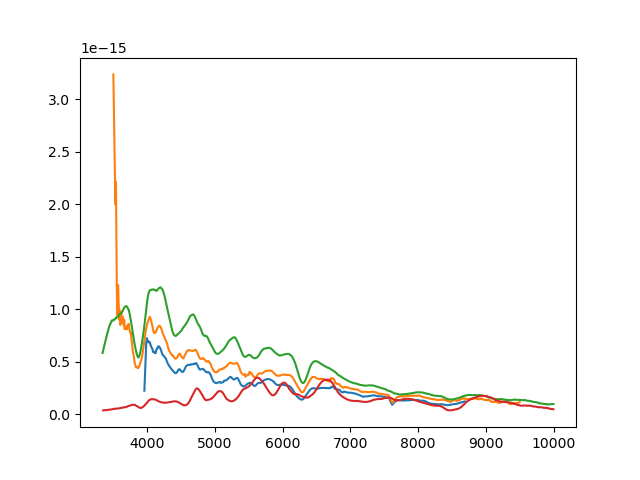

In [18]:
plt.figure()
for sed in seds:
    plt.plot(seds[sed].wave,seds[sed].flux)

<IPython.core.display.Javascript object>


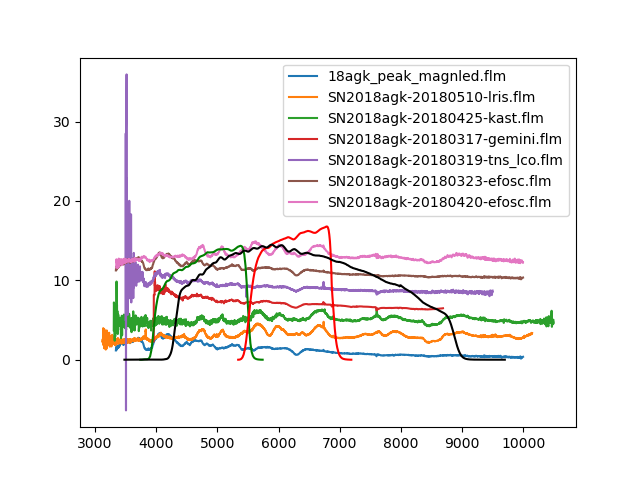

In [147]:
plt.figure()
i = 0

for spec in files:
    file = spec
    data = np.loadtxt(spec,skiprows=1)
    plt.plot(data[:,0],data[:,1]/np.nanmedian(data[:,1]) + i,label=file.split('/')[-1])
    i += 2
    
    
plt.plot(g.wave,g.throughput*20,'g')
plt.plot(r.wave,r.throughput*20,'r')
plt.plot(k.wave,k.throughput*20,'k')
plt.legend()

<IPython.core.display.Javascript object>


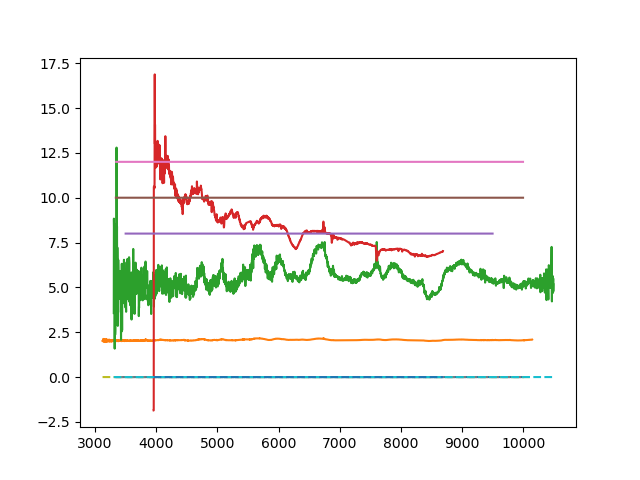

In [154]:
plt.figure()
i = 0

for spec in files:
    file = spec
    data = np.loadtxt(spec,skiprows=1)
    plt.plot(data[:,0],data[:,1] + i,label=file.split('/')[-1])
    i += 2
    
#plt.plot(mmodel.wave,mmodel.flux,'--')
i = 0
for modelname in seds:
    flux = savgol_filter(seds[modelname].flux,31,3)
    plt.plot(seds[modelname].wave,flux,'--')

In [43]:
len(specs)

4

,wave,Unnamed: 1,Unnamed: 2,flux
0,3340.20,NaN,NaN,4.627249e-16
1,3344.41,NaN,NaN,6.229911e-16
2,3348.62,NaN,NaN,6.493533e-16
3,3352.83,NaN,NaN,5.492550e-16
4,3357.05,NaN,NaN,5.032636e-16
...,...,...,...,...
1577,9981.12,NaN,NaN,1.214052e-16
1578,9985.34,NaN,NaN,1.082592e-16
1579,9989.55,NaN,NaN,1.302543e-16
1580,9993.76,NaN,NaN,1.412107e-16


In [126]:
seds = {}
for i in range(len(specs)):
    dat = pd.read_csv(files[i],delimiter=' ')
    flux = savgol_filter(dat.flux,31,3)
    spec = S.ArraySpectrum(dat.wave.values,flux,waveunits='angstrom')
    spec = my_norm(spec,pb_swope,float(specs[i][3]))
    seds[specs[i][0]] = spec

Warning, 3 of 3140 bins contained negative fluxes; they have been set to zero.


In [71]:
model_sed = source_synphot.source.pre_process_source('../Kepler/sn/2018agk/agk_spec/18agk_peak_magnled.flm',np.nan,
                                                         'CSP.g',0,Renorm=False,svo=True)

pbk, zpk = pbs['Kep']
pbg, zpg = pb_swope['CSP.g']
pbr, zpr = pb_swope['CSP.r']

mmk = []
mmg = []
mmr = []
model= model_sed
mmodel = S.ArraySpectrum(model.wave, model.flux, name=modelname)
mmk += [source_synphot.passband.synphot(mmodel, pbk,zpk)]
mmg += [source_synphot.passband.synphot(mmodel, pbg,zpg)]
mmr += [source_synphot.passband.synphot(mmodel, pbr,zpr)]

#pbr, zpr = pbs['ps1g']
#r = source_synphot.passband.synphot(model_sed, pbr,zpr)

/Users/rridden/Documents/work/code/source_synphot/source_synphot/source.py:109: RuntimeWarning: Spectrum ../Kepler/sn/2018agk/agk_spec/18agk_peak_magnled.flm not listed in lookup table
  warnings.warn(message, RuntimeWarning)


In [66]:
mangled = np.array((mmg,mmr,mmk)).T

In [70]:
np.savetxt('../Kepler/sn/2018agk/agk_spec/peak_mangled.txt',mangled,fmt='%f')

In [88]:
from scipy.signal import savgol_filter

In [33]:
pbk, zpk = pbs['Kep']
pbg, zpg = pb_swope['CSP2.g']
pbr, zpr = pb_swope['CSP2.r']
pdg, zdg = pb_decam['DECam.g']
pdi, zdi = pb_decam['DECam.i']
pdr, zdr = pb_decam['DECam.r']

mk = []
mg = []
mr = []
mdg = []
mdi = []
mdr = []

for modelname in seds:
    model= seds[modelname]
    #flux = savgol_filter(model.flux,31,3)
    model = S.ArraySpectrum(model.wave, model.flux, name=modelname)
    mk += [source_synphot.passband.synphot(model, pbk,zpk)]
    mg += [source_synphot.passband.synphot(model, pbg,zpg)]
    mr += [source_synphot.passband.synphot(model, pbr,zpr)]
    
    mdg += [source_synphot.passband.synphot(model, pdg,zdg)]
    mdi += [source_synphot.passband.synphot(model, pdi,zdi)]
    mdr += [source_synphot.passband.synphot(model, pdr,zdr)]
mk = np.array(mk)
mg = np.array(mg)
mr = np.array(mr)
mdg = np.array(mdg)
mdi = np.array(mdi)
mdr = np.array(mdr)
#pbr, zpr = pbs['ps1g']
#r = source_synphot.passband.synphot(model_sed, pbr,zpr)

<IPython.core.display.Javascript object>


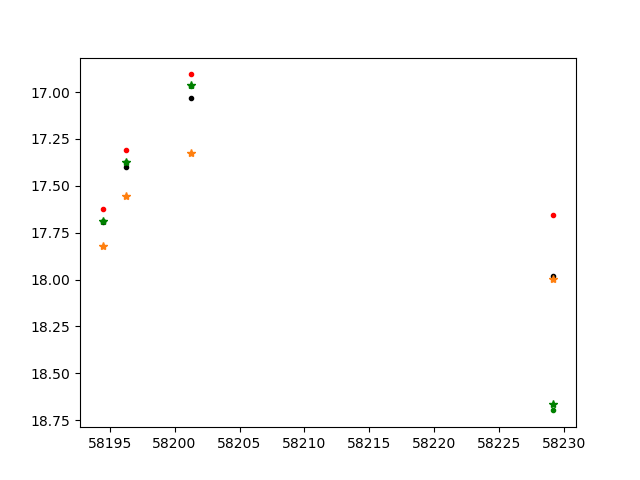

In [29]:
plt.figure()
plt.plot(specs[:,1].astype(float),mk,'k.')
plt.plot(specs[:,1].astype(float),mg,'g.')
plt.plot(specs[:,1].astype(float),mr,'r.')

plt.plot(specs[:,1].astype(float),mdg,'g*')
plt.plot(specs[:,1].astype(float),mdi,'C1*')
plt.gca().invert_yaxis()

In [42]:
mags[:,2] - di_mags[:,1]

array([4.90523154e-06, 9.24343271e-06, 7.13596330e-05, 8.75358373e-05])

In [34]:
kep_mags = np.array([specs[:,1].astype(float),mk]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_k.npy',kep_mags)

In [43]:
kep_mags = np.array([specs[:,1].astype(float),mk]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_kep-m.npy',kep_mags)

g_mags = np.array([specs[:,1].astype(float),mg]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_g-m.npy',g_mags)

r_mags = np.array([specs[:,1].astype(float),mr]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_r-m.npy',r_mags)

dg_mags = np.array([specs[:,1].astype(float),mdg]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_decamg-m.npy',dg_mags)

di_mags = np.array([specs[:,1].astype(float),mdi]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_decami-m.npy',di_mags)

dr_mags = np.array([specs[:,1].astype(float),mdr]).T
np.save('../Kepler/sn/2018agk/agk_spec/synphot_salt_decamr-m.npy',dr_mags)

In [44]:
di_mags

array([[5.81944500e+04, 1.78192082e+01],
       [5.81962600e+04, 1.75523339e+01],
       [5.82012600e+04, 1.73264732e+01],
       [5.82291700e+04, 1.79979035e+01]])

In [83]:
single = seds['SN2018agk-20180319-tns_lco.flm'] 
single = S.ArraySpectrum(single.wave, single.flux, name='single')

In [247]:
seds = {}
for i in range(len(specs)):
    dat = np.loadtxt(path + specs[i][0],skiprows=1)
    flux = savgol_filter(dat[:,1],3,1)
    spec = S.ArraySpectrum(dat[:,0],flux,waveunits='angstrom',fluxunits='flam')
    spec = my_norm(spec,pb_decam,float(specs[i][5]))
    seds[specs[i][0]] = spec

Warning, 2 of 3140 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 3123 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 1581 bins contained negative fluxes; they have been set to zero.


In [220]:
seds

{'SN2018agk-20180317-gemini.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7f9e930dc6d0>,
 'SN2018agk-20180319-tns_lco.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7f9eb18adad0>,
 'SN2018agk-20180323-efosc.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7f9eb187f710>,
 'SN2018agk-20180420-efosc.flm': <pysynphot.spectrum.ArraySourceSpectrum at 0x7f9eb18aded0>}

In [177]:
files

['../Kepler/SN/2018agk/agk_spec/18agk_peak_magnled.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180510-lris.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180425-kast.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180317-gemini.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180319-tns_lco.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180323-efosc.flm',
 '../Kepler/SN/2018agk/agk_spec/SN2018agk-20180420-efosc.flm']

In [214]:
specs[]

array([['SN2018agk-20180317-gemini.flm', '58194.45', '17.69', '17.69',
        '17.74'],
       ['SN2018agk-20180319-tns_lco.flm', '58196.26', '17.41', '17.36',
        '17.46'],
       ['SN2018agk-20180323-efosc.flm', '58201.26', '16.95', '16.96',
        '17.09'],
       ['SN2018agk-20180420-efosc.flm', '58229.17', '18.63', '18.70',
        '18.00']], dtype=object)

<IPython.core.display.Javascript object>


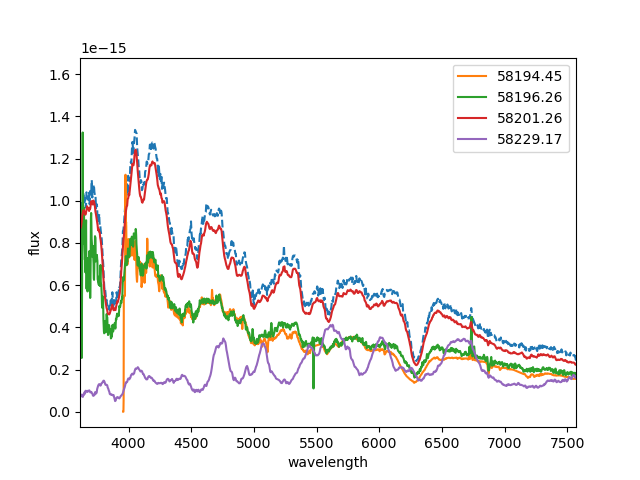

<IPython.core.display.Javascript object>


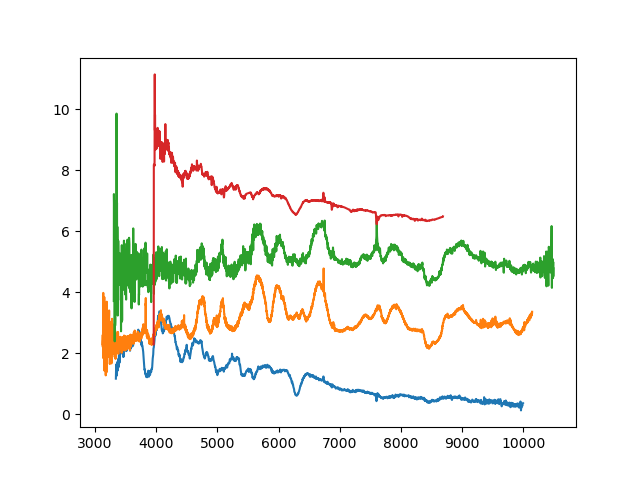

In [317]:
plt.figure()
plt.plot(mmodel.wave,mmodel.flux,'--')
i = 0
for modelname in seds:
    #flux = savgol_filter(seds[modelname].flux,31,3)
    flux = seds[modelname].flux
    plt.plot(seds[modelname].wave,flux,label=specs[i][1])
    i += 1
plt.legend()
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.savefig('normed_agk_spec.png')


plt.figure()
i = 0
for spec in files[:4]:
    file = spec
    data = np.loadtxt(spec,skiprows=1)
    plt.plot(data[:,0],data[:,1]/np.nanmedian(data[:,1]) + i,label=file.split('/')[-1])
    i += 2

In [264]:
from scipy.interpolate import interp1d

In [383]:
def mangle(spec,pbs,mags):
    scale = np.array((spec.wave,spec.flux))
    scale[1,:] = 1
    i = 0
    inds = []
    for pb in pbs:
        filt = pbs[pb]
        syn_mag = source_synphot.passband.synphot(spec,filt[0],zp=filt[1])
        factor = 10**(-2/5*(mags[i]-syn_mag))
        med_wav = np.nanmedian(filt[0].wave)
        ind = np.argmin(abs(scale[0,:] - med_wav))
        inds += [ind]
        scale[1,ind] = factor
        i += 1 
    #interp = interp1d(scale[0,inds],scale[1,inds],kind='linear',bounds_error=False)
    #interped = interp(scale[0,:])
    #interped[:min(inds)] = scale[1,min(inds)]
    #interped[:max(inds)] = scale[1,max(inds)]
    factors = np.interp(scale[0,:],scale[0,inds],scale[1,inds])
    plt.figure()
    plt.plot(scale[0,:],factors,'.')
    plt.plot(scale[0,inds],factors[inds],'x')
    scale[1,:] = factors
    s = S.ArraySpectrum(spec.wave,spec.flux*scale[1,:])
    return s

In [392]:
mags[[0,2,1]]

array([[17.68, 17.82, 17.61],
       [16.96, 17.32, 16.93],
       [17.36, 17.55, 17.31]])

In [391]:
mags = np.array(specs)[:,-3:].astype(float)
mags

array([[17.68, 17.82, 17.61],
       [17.36, 17.55, 17.31],
       [16.96, 17.32, 16.93],
       [18.67, 17.99, 17.71]])

Warning, 2 of 3140 bins contained negative fluxes; they have been set to zero.
1.168587282524194e-16


<IPython.core.display.Javascript object>


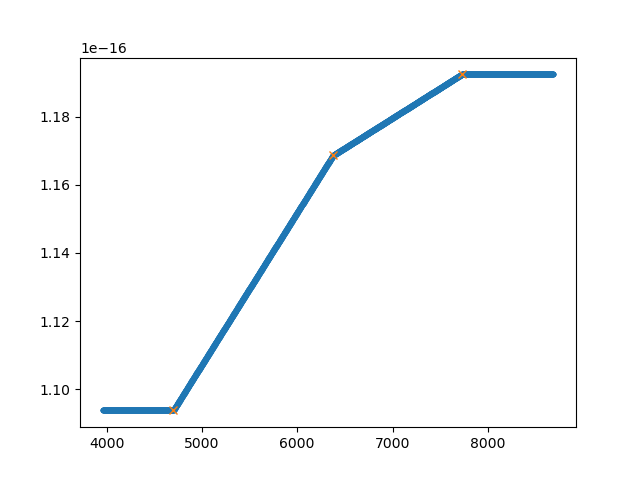

Warning, 4 of 3123 bins contained negative fluxes; they have been set to zero.
0.6969060646169587


<IPython.core.display.Javascript object>


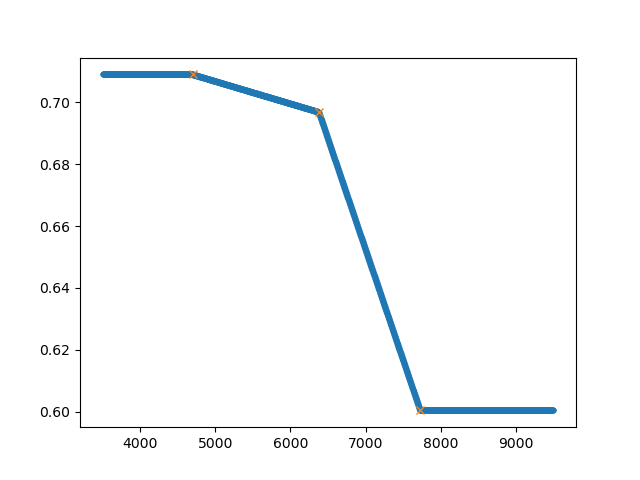

0.8528056178998875


<IPython.core.display.Javascript object>


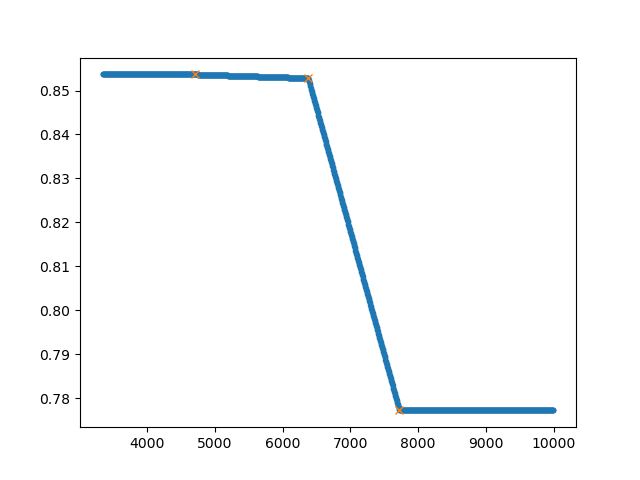

Warning, 6 of 1581 bins contained negative fluxes; they have been set to zero.
1.6526269015638124


<IPython.core.display.Javascript object>


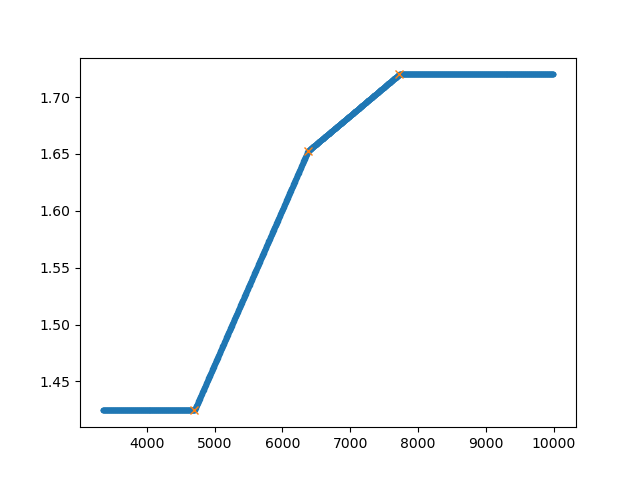

In [397]:
mags = np.array(specs)[:,-3:].astype(float)
seds = {}
old = {}
for i in range(len(specs)):
    dat = np.loadtxt(path + specs[i][0],skiprows=1)
    flux = savgol_filter(dat[:,1],3,1)
    spec = S.ArraySpectrum(dat[:,0],flux,waveunits='angstrom',fluxunits='flam')
    old[specs[i][0]] = my_norm(spec,pb_decam,float(specs[i][-2]))
    spec = mangle(spec,pb_decam,mags[i])
    seds[specs[i][0]] = spec

<IPython.core.display.Javascript object>


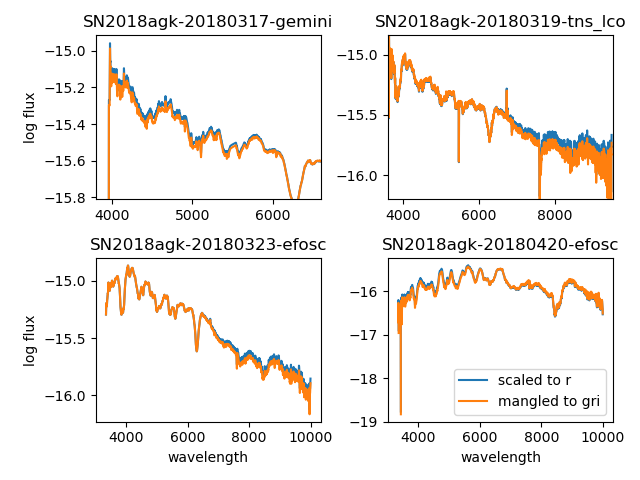

/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the C

In [399]:
plt.figure()
i = 0
for modelname in seds:
    #flux = savgol_filter(seds[modelname].flux,31,3)
    plt.subplot(2,2,i+1)
    plt.title(specs[i][0].split('.')[0])
    oldf = old[modelname].flux
    flux = seds[modelname].flux
    plt.plot(old[modelname].wave,np.log10(oldf),label='scaled to r')
    plt.plot(seds[modelname].wave,np.log10(flux),label='mangled to gri')
    
    if (i ==0) | (i==2):
        plt.ylabel('log flux')
    if (i==2) | (i==3):
        plt.xlabel('wavelength')
    i += 1
    
plt.legend()
plt.tight_layout()


<IPython.core.display.Javascript object>


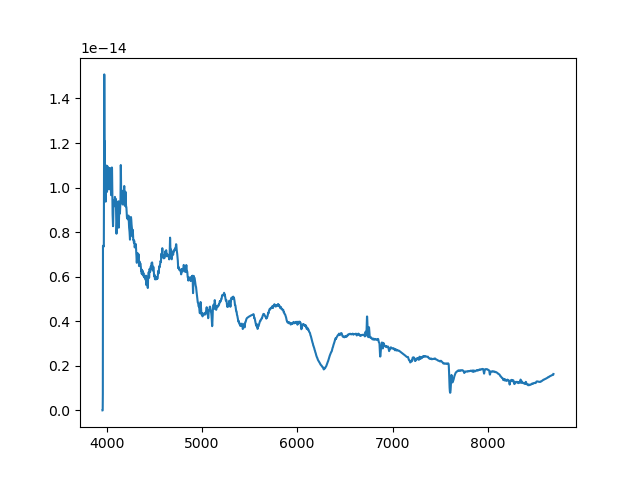

In [306]:
plt.figure()
plt.plot(m.wave,m.flux)

In [259]:
s = seds['SN2018agk-20180317-gemini.flm']

In [263]:
scale.shape

(2, 3140)

In [ ]:
color1 = 'ps1g_ps1r'
color2 = 'ps1r_ps1i'
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
mg = []
mr = []
mi = []
mz = []

pbg, zpg = pbs['ps1g']
pbr, zpr = pbs['ps1r']
pbi, zpi = pbs['ps1i']
pbz, zpz = pbs['ps1z']
#pb5, zp5 = pbs[c5]
# construct color-color vectors
ind = []
for modelname in model_sed:
    model= model_sed[modelname]
    model = S.ArraySpectrum(model.wave, model.flux, name=modelname)
    mg += [source_synphot.passband.synphot(model, pbg,zpg)]
    mr += [source_synphot.passband.synphot(model, pbr,zpr)]
    mi += [source_synphot.passband.synphot(model, pbi,zpi)]
    mz += [source_synphot.passband.synphot(model, pbz,zpz)]
    
    for i in range(len(obs)):
        if modelname.split('/')[-1].split('.')[0] in obs['objid'].iloc[i].lower():
            ind += [i]
    
    #thiscol1 = source_synphot.passband.syncolor(model, pbg, pbr, zpg, zpr)
    #thiscol2 = source_synphot.passband.syncolor(model, pbg, pbi, zpg, zpi)
    #thiscol3 = source_synphot.passband.syncolor(model, pbr, pbi, zpr, zpi)
    #col1.append(thiscol1)
    #col2.append(thiscol2)
    #col3.append(thiscol3)
mg = np.array(mg)
mr = np.array(mr)
mi = np.array(mi)
mz = np.array(mz)
# select only useful objects
#good = ~np.isnan(col1)* ~np.isnan(col2)
#good = np.array(good)